1. Import Libraries

In [2]:
!pip install xgboost

In [51]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

2. Upload Dataset

In [5]:
df = pd.read_csv('.\data\cars.csv')

In [6]:
df.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


In [7]:
df.shape

(762091, 20)

In [8]:
print(df.dtypes)

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object


3. Data Cleaning

In [10]:
df = df[df['manufacturer'] != 'Tesla']  #Lacking data for mpg, which impacts decision to choose a car

In [11]:
missing_data = df.isnull().sum()
print(missing_data)

manufacturer                0
model                       0
year                        0
mileage                   506
engine                  15014
transmission             9904
drivetrain              21553
fuel_type               22917
mpg                    136188
exterior_color           8688
interior_color          56197
accidents_or_damage     23688
one_owner               30947
personal_use_only       24328
seller_name              8236
seller_rating          212296
driver_rating           31266
driver_reviews_num          0
price_drop             349559
price                       0
dtype: int64


In [12]:
# Fill missing mileage grouped by model
df['mileage'] = df.groupby('model')['mileage'].transform(lambda x: x.fillna(x.median()))

In [13]:
unknown = ['engine', 'transmission', 'drivetrain', 'fuel_type', 'exterior_color', 'interior_color', 
          'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name', 'driver_rating']

df[unknown] = df[unknown].fillna('Unknown')
print(df[unknown].isnull().sum())

engine                 0
transmission           0
drivetrain             0
fuel_type              0
exterior_color         0
interior_color         0
accidents_or_damage    0
one_owner              0
personal_use_only      0
seller_name            0
driver_rating          0
dtype: int64


In [14]:
print(df['mpg'].head())

0    39-38
1    39-38
2    39-38
3    39-38
4    39-38
Name: mpg, dtype: object


In [15]:
def avg_mpg_range(mpg_range):
    '''Function to convert string type of mpg ranges and using average of the range'''
    if isinstance(mpg_range, str) and '-' in mpg_range:
        mpgs = mpg_range.split('-')
        try:
            return (float(mpgs[0]) + float(mpgs[1])) / 2
        except ValueError:
            return None 
    return None

In [16]:
df['mpg'] = df['mpg'].apply(avg_mpg_range)

In [17]:
print(df['mpg'].head())

0    38.5
1    38.5
2    38.5
3    38.5
4    38.5
Name: mpg, dtype: float64


In [18]:
df['mpg'] = df.groupby('model')['mpg'].transform(lambda x: x.fillna(x.median()))

In [19]:
df['mpg'] = df.groupby('manufacturer')['mpg'].transform(lambda x: x.fillna(x.median()))   #perform operation again to make sure mpg column is clean

In [20]:
df = df.drop(columns=['price_drop', 'seller_rating'])   #missing ~50% of data for all cars or can't infer

In [21]:
missing_data = df.isnull().sum()     #verify clean data
print(missing_data)

manufacturer           0
model                  0
year                   0
mileage                3
engine                 0
transmission           0
drivetrain             0
fuel_type              0
mpg                    0
exterior_color         0
interior_color         0
accidents_or_damage    0
one_owner              0
personal_use_only      0
seller_name            0
driver_rating          0
driver_reviews_num     0
price                  0
dtype: int64


In [22]:
print(df.columns)

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'driver_rating', 'driver_reviews_num', 'price'],
      dtype='object')


In [23]:
brand_stats = df.groupby('manufacturer').agg(
    median_price=('price', 'median'),   #Using median because some brands have a range of cheap to expensive models, skewing the mean
    avg_mileage=('mileage', 'mean'),
    avg_mpg=('mpg', 'mean'),
    count_cars=('price', 'size')
)

In [24]:
brand_stats_sorted = brand_stats.sort_values(by = 'median_price', ascending = True)

In [25]:
print(brand_stats_sorted)

               median_price   avg_mileage    avg_mpg  count_cars
manufacturer                                                    
Mitsubishi          19195.0  53517.581665  26.997736        5743
Hyundai             20410.0  53910.529455  28.698095       22203
Kia                 20998.0  51772.529889  27.988129       35063
Nissan              22400.0  55997.521729  26.206026       48529
Chrysler            22694.0  72063.956472  22.651538       12647
Buick               22908.5  52093.829082  24.748051       14624
Volkswagen          22995.0  52229.837510  27.076015       24620
Dodge               23196.0  69625.534812  20.360446       25250
Mazda               23995.0  51684.661586  27.657995       15485
Honda               24998.0  60510.152571  28.126137       37612
Subaru              25523.0  54252.908750  27.621089       24767
Chevrolet           26950.0  60646.142435  21.229966       56043
Jeep                27829.0  52059.029449  21.732917       41665
Acura               28797

In [26]:
df.describe()

,year,mileage,mpg,driver_reviews_num,price
count,756208.000000,7.562050e+05,756208.000000,756208.000000,7.562080e+05
mean,2017.781774,5.592385e+04,23.462341,90.037716,3.639094e+04
std,5.124753,4.363347e+04,8.358704,115.368010,1.991885e+06
min,1915.000000,0.000000e+00,0.000000,0.000000,1.000000e+00
25%,2016.000000,2.334500e+04,20.500000,14.000000,1.950000e+04
50%,2019.000000,4.574900e+04,23.500000,51.000000,2.790000e+04
75%,2021.000000,7.862100e+04,27.500000,119.000000,3.900000e+04
max,2024.000000,1.119067e+06,127.500000,1025.000000,1.000000e+09


In [69]:
avg_mileage_price = df.groupby('manufacturer').agg({
    'mileage': 'mean',    
    'price': 'median'       
}).reset_index()

print(avg_mileage_price)

     manufacturer       mileage    price
0           Acura  53805.677347  28797.0
1            Audi  49496.451772  33952.0
2             BMW  49547.388049  33500.0
3           Buick  52093.829082  22908.5
4        Cadillac  52368.526301  33995.5
5       Chevrolet  60646.142435  26950.0
6        Chrysler  72063.956472  22694.0
7           Dodge  69625.534812  23196.0
8            Ford  59962.228372  29487.0
9             GMC  62295.221104  35800.0
10          Honda  60510.152571  24998.0
11        Hyundai  53910.529455  20410.0
12       INFINITI  58168.623240  30000.0
13         Jaguar  46904.896224  31998.0
14           Jeep  52059.029449  27829.0
15            Kia  51772.529889  20998.0
16     Land Rover  47347.496659  44990.0
17          Lexus  59554.408807  34500.0
18        Lincoln  52531.728177  31795.0
19          Mazda  51684.661586  23995.0
20  Mercedes-Benz  44618.470825  39783.5
21     Mitsubishi  53517.581665  19195.0
22         Nissan  55997.521729  22400.0
23        Porsch

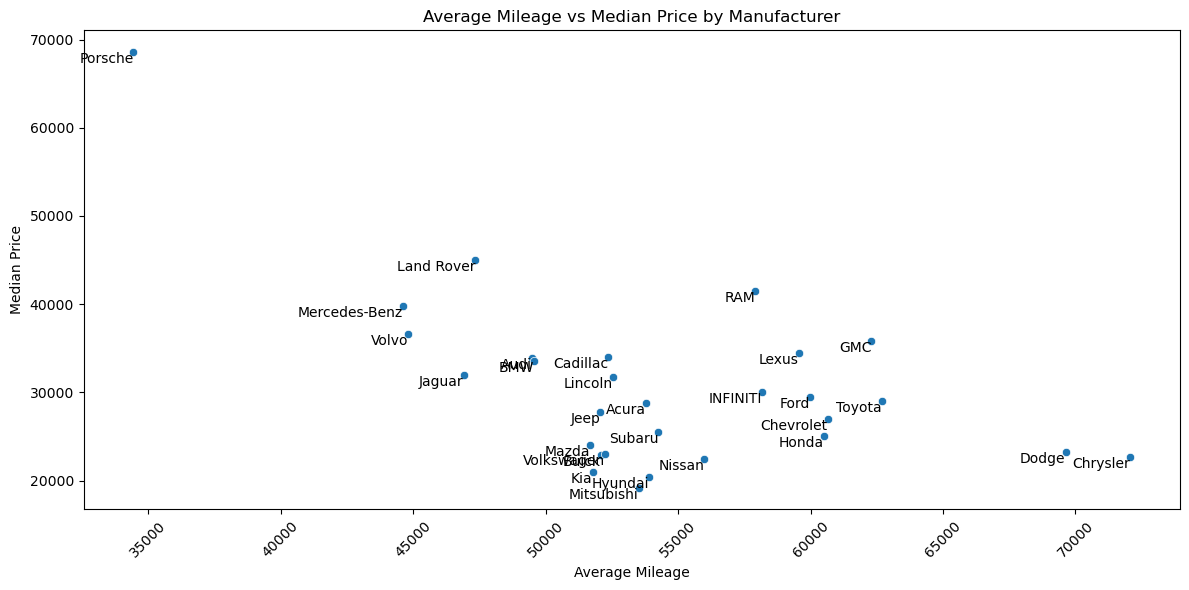

In [101]:
plt.figure(figsize=(12, 6))
plot = sns.scatterplot(data = avg_mileage_price, x = 'mileage', y = 'price')

plt.title('Average Mileage vs Median Price by Manufacturer')
plt.xlabel('Average Mileage')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.tight_layout()
for i, row in avg_mileage_price.iterrows(): 
    plot.text(row['mileage'], row['price'], row['manufacturer'], ha = 'right', va = 'top')
plt.show()